In [2]:
cd ..

c:\Users\andrey\Projects\case_3m


c:\Users\andrey\Projects\case_3m\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
import os
import sys

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from case.etl_process import ETLProcess
from case.model import ModelProcess

import warnings

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
%matplotlib inline
sns.set_context("notebook")
sns.set_style("whitegrid")

# turn off warnings for final notebook
warnings.filterwarnings("ignore")


# Load and process the data

In [4]:
data_path = "../data/marketing_campaign_wines.xlsx"
etl = ETLProcess(data_path=data_path)

df = etl.process()

model = ModelProcess(n_components=4, n_clusters=4)
model.fit(df)

df = model.predict(df)


Start processing data
Read data with shape (2240, 29)
Fix marital status
Deduplicate rows
Found 41 inconsistent duplicated rows
         id  year_birth   education marital_status   income  kidhome  teenhome dt_customer  recency  mnt_wines  mnt_fruits  mnt_meat_products  mnt_fish_products  mnt_sweet_products  mnt_gold_prods  num_deals_purchases  num_web_purchases  num_catalog_purchases  num_store_purchases  num_web_visits_month  accepted_cmp3  accepted_cmp4  accepted_cmp5  accepted_cmp1  accepted_cmp2  complain  z_cost_contact  z_revenue  response  target_sum  target_count
39     2968        1943         phd       divorced  48948.0        0         0  2013-01-02       53        437           8                206                160                  49              42                    2                  7                     10                    5                     6              1              0              0              0              0         0               3         11       

# Clusters Identification

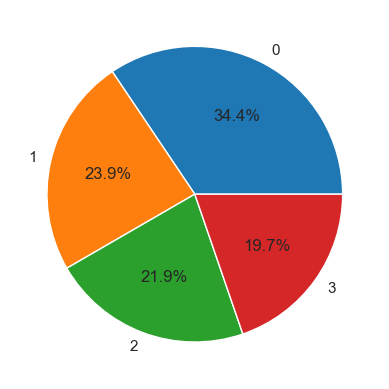

In [5]:
dist = df["cluster"] .value_counts(normalize=True)
# plot pie chart

plt.pie(dist, labels=dist.index, autopct='%1.1f%%');

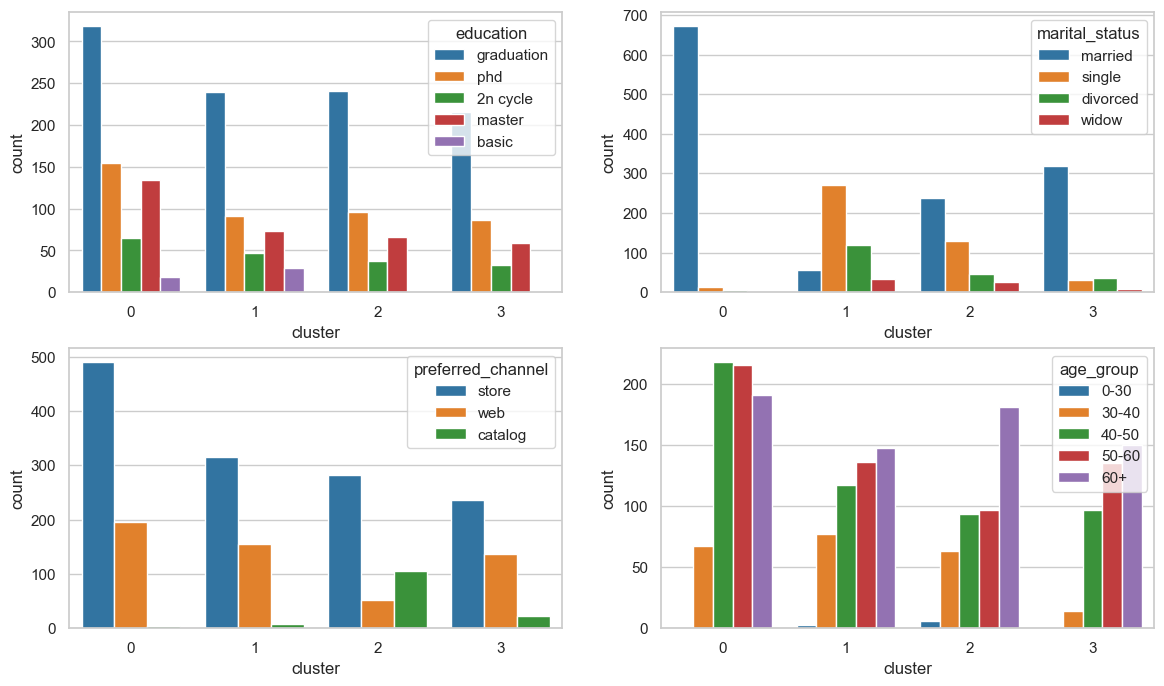

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(14,8))
sns.countplot(data=df, x = 'cluster', hue='education', ax=ax1[0])
sns.countplot(data=df, x = 'cluster', hue='marital_status', ax=ax1[1])
sns.countplot(data=df, x = 'cluster', hue='preferred_channel', ax=ax2[0])
sns.countplot(data=df, x = 'cluster', hue='age_group', ax=ax2[1])
plt.show()

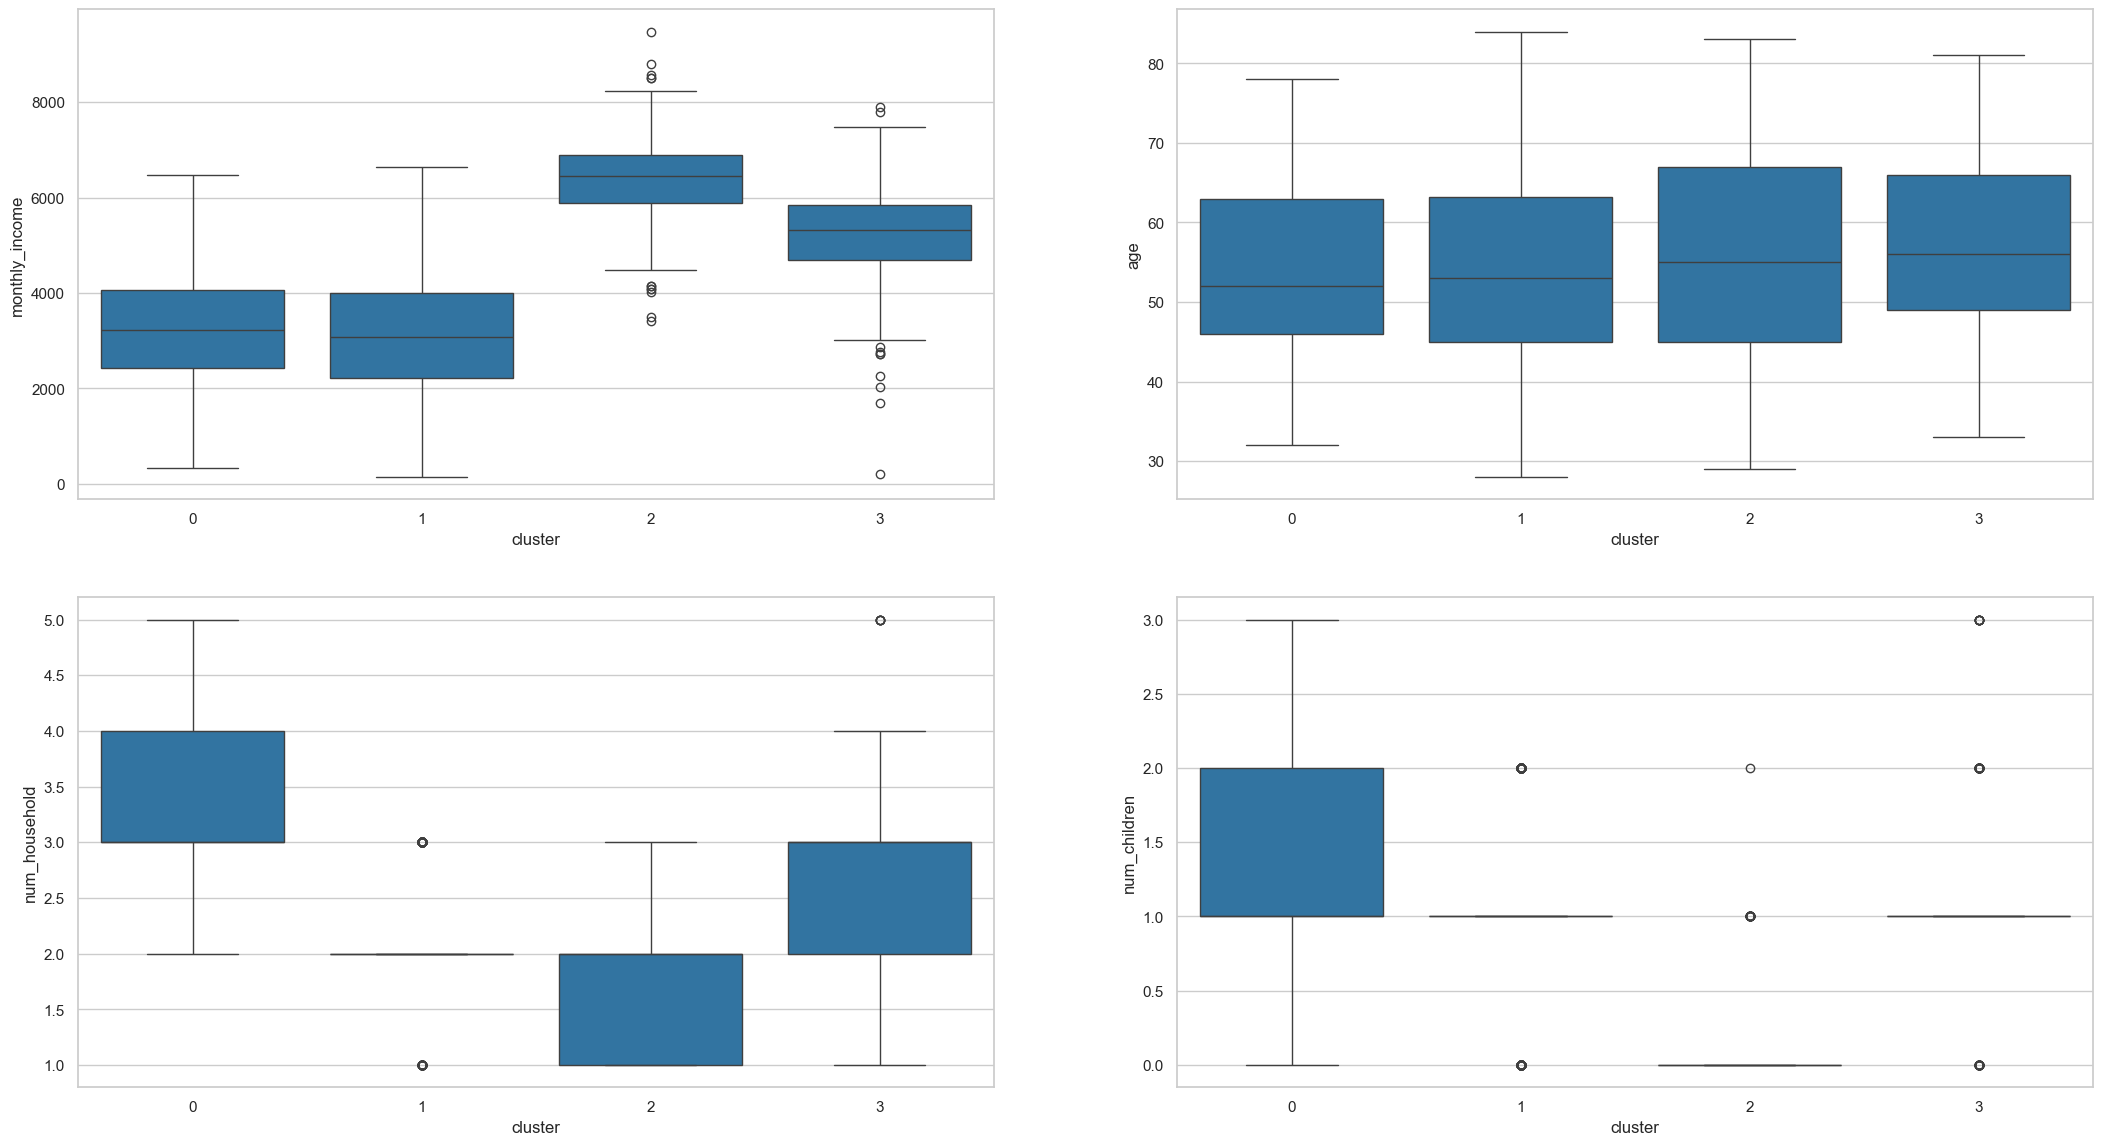

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(26,14))
sns.boxplot(data=df, x = 'cluster', y='monthly_income', ax=ax1[0])
sns.boxplot(data=df, x = 'cluster', y='age', ax=ax1[1])
sns.boxplot(data=df, x = 'cluster', y='num_household', ax=ax2[0])
sns.boxplot(data=df, x = 'cluster', y='num_children', ax=ax2[1])
plt.show()

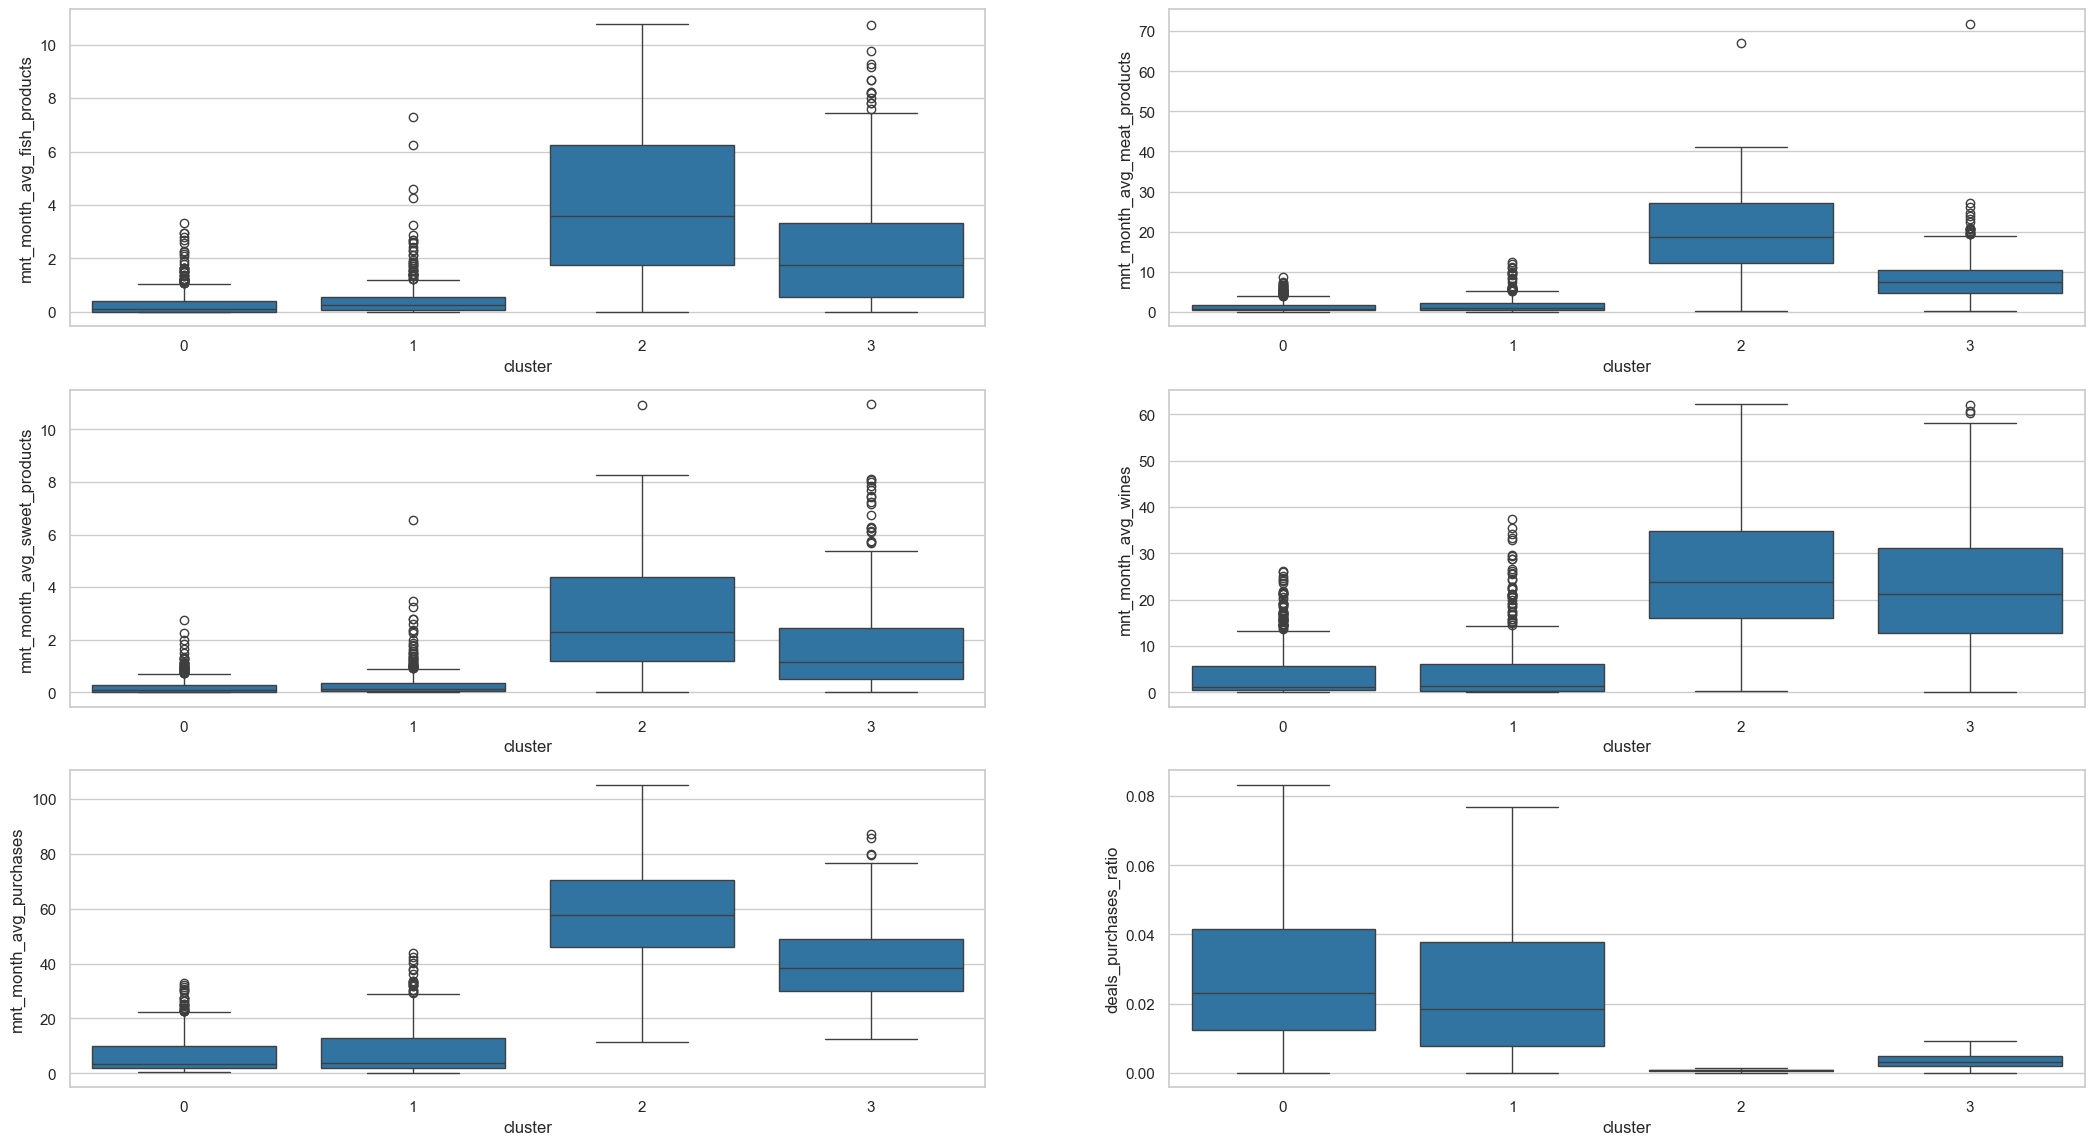

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 2, figsize=(26,14))
sns.boxplot(data=df, x = 'cluster', y='mnt_month_avg_fish_products', ax=ax1[0])
sns.boxplot(data=df, x = 'cluster', y='mnt_month_avg_meat_products', ax=ax1[1])
sns.boxplot(data=df, x = 'cluster', y='mnt_month_avg_sweet_products', ax=ax2[0])
sns.boxplot(data=df, x = 'cluster', y='mnt_month_avg_wines', ax=ax2[1])
sns.boxplot(data=df, x = 'cluster', y='mnt_month_avg_purchases', ax=ax3[0])
sns.boxplot(data=df, x = 'cluster', y='deals_purchases_ratio', ax=ax3[1], showfliers=False)

plt.show()